# Homework 3  - Tryout pandas and numpy

Copy this notebook. Rename it as: YOURNAME-Homework-panda-numpy-Sept-2017

with your name replacing yourname and  replaced with the date you submit or to the last part.

Do the homeworks problems below.

Upload your completed jupyter notebook to your github site and send me the url via the elearning site as your homework submission. Please note that you need to do your own 3.4, and 3.5 if you share data and analysis from others then you cannot get more than a 3.  

## Homework 3.1

### 3.1.a
Load the data from: http://opendata.dc.gov/datasets that I have include in this github   
into a dataframe.  ( The file has been is available in directory ./data/ccp_current_csv.csv )

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#ignoring missing data
data = np.genfromtxt("./data/ccp_current_csv.csv", delimiter=",", dtype=str, invalid_raise=False)

C:\Users\Ernie\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: ConversionWarning: Some errors were detected !
    Line #368 (got 16 columns instead of 27)
    Line #382 (got 16 columns instead of 27)
    Line #453 (got 16 columns instead of 27)
  import sys


### 3.1.a  what is its shape and what does that mean?

In [34]:
data.shape

# data.shape prints out the dimensions of the dataset
# in this case, its 463, 27 (rows, cols)

(463L, 27L)

## Homework 3.2
 What are the number of rows in each 'QUADRANT' ?

In [35]:
#I cannot find 'QUADRANT' defined anywhere in the numpy documentation or the notebooks

## Homework 3.3 - Array math demonstration 
For two arrarys  

In [36]:
a = np.array([1,2,3,4], dtype=float)
b = np.array([5,6,7,8], dtype=float)

Peform the following array operations using numpy   
( show both operational use of numpy and functional (example addition operation => + vs addition function => numbpy.add() )

### 3.3.1 addition a+b 

In [37]:
c = a + b
c

array([ 6.,  8., 10., 12.])

### 3.3.2 subtraction a-b

In [38]:
c = a - b
c

array([-4., -4., -4., -4.])

### 3.3.3 multiplication a*b

In [39]:
c = a * b
c

array([ 5., 12., 21., 32.])

### 3.3.4 divsion a/b

In [40]:
c = a / b
c

array([0.2       , 0.33333333, 0.42857143, 0.5       ])

### 3.3.5 modulo  a%b

In [41]:
c = a % b
c

array([1., 2., 3., 4.])

### 3.3.6 power  a^b

In [42]:
c = a ** b
c

array([1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04])

## Homework 3.4
Find your own data and load it into a dataframe

In [43]:
sidewalks_np = np.genfromtxt("./data/Sidewalks_2008.csv", delimiter=",", dtype=float, usecols=(2,5,6))
sidewalks_pd = pd.read_csv("./data/Sidewalks_2008.csv",
                           header=0,
                           index_col=["DESCRIPTION","FEATURECODE","CAPTUREYEAR"],
                           usecols=["DESCRIPTION","FEATURECODE","CAPTUREYEAR","SHAPEAREA","SHAPELEN"],
                           parse_dates=["CAPTUREYEAR"])
sidewalks_np.shape

(33740L, 3L)

Above I have loaded in sidewalk size data from Washington DC. While some data is from a 1999 survey of DC, many entries have been updated in 2008.

## Homework 3.5
Using Pandas, lets perform some basic statistics analysis.

In [44]:
print(sidewalks_pd.describe())

          SHAPEAREA      SHAPELEN
count  33739.000000  33739.000000
mean     257.039600    213.938478
std      782.614648    436.726480
min        0.000056      0.053221
25%       25.300891     31.386316
50%       93.059121     96.997362
75%      269.622152    268.178694
max    50747.024251  22148.158605


SHAPEAREA is used to represent the sidewalks area in units<sup>2</sup> whie the SHAPELEN is the sidewalk length given in units. The exact unit used is not given though based upon the data my educated guess is yards.

Here we can see the number of entries (count),
the average of all entries (mean),
the standard deviation (std),
the (min)imum, the (max)imum, and what the 25th, 50th, and 75th percentile all look like.

Lets break this down even more though. There are two types of sidewalks as layed out in the "DESCRIPTION" column: Sidewalk and Hidden Sidewalk. Let's separate the data and compare them in numpy.

In [45]:
#separating the data using numpys handy indexing
sidewalk_indexes_np = sidewalks_np[sidewalks_np[:, 0] == 1480, 1:]
hidden_indexes_np = sidewalks_np[sidewalks_np[:, 0] == 1481, 1:]

#aliasing for readability
sin = sidewalk_indexes_np
hin = hidden_indexes_np

print "Sidewalk vs Hidden Sidewalk"

print "\nData Size"
print "Sidewalk:\t\t",sin.shape[0]
print "Hidden Sidewalk:\t",hin.shape[0]

print "\nMaximum"
print "Sidewalk \t[Area, Length]", np.amax(sin, axis = 0)
print "Hidden Sidewalk [Area, Length]",np.amax(hin, axis = 0)

print "\nMinimum"
print "Sidewalk \t[Area, Length]", np.amin(sin, axis = 0)
print "Hidden Sidewalk [Area, Length]", np.amin(hin, axis = 0)

print "\nRange"
print "Sidewalk \t[Area, Length]", np.ptp(sin, axis = 0)
print "Hidden Sidewalk [Area, Length]", np.ptp(hin, axis = 0)

print "\nMean"
print "Sidewalk \t[Area, Length]", np.mean(sin, axis = 0)
print "Hidden Sidewalk [Area, Length]", np.mean(hin, axis = 0)


Sidewalk vs Hidden Sidewalk

Data Size
Sidewalk:		33511
Hidden Sidewalk:	228

Maximum
Sidewalk 	[Area, Length] [50747.024251   22148.15860494]
Hidden Sidewalk [Area, Length] [982.352482   358.21577174]

Minimum
Sidewalk 	[Area, Length] [5.60000000e-05 5.32205874e-02]
Hidden Sidewalk [Area, Length] [2.48069    6.81364837]

Range
Sidewalk 	[Area, Length] [50747.024195   22148.10538435]
Hidden Sidewalk [Area, Length] [979.871792   351.40212337]

Mean
Sidewalk 	[Area, Length] [258.27360146 215.00168861]
Hidden Sidewalk [Area, Length] [75.66848332 57.66976792]


Some interesting stuff is going on. 

For one, there are ~146x as many sidewalks as their are hidden sidewalks.

Not surprisingly, sidewalks have the largest range by far with the maximum area being over 50,000 yards<sup>2</sup> while the minimum is effectively 0. Hidden sidewalks appear to not as extreme with a maximum area of 982 yards <sup>2</sup> and minimum of about 2.5 yards<sup>2</sup>.

As expected, the hidden sidewalks are on average less than 1/4 the the area of the normal sidewalks. It would be rather strange if "hidden" sidewalks were somehow larger or their dataset was bigger than their non-hidden counter parts.

There are some stark differences between these two data sets in both size of the data and difference between individual data points. Lets graph them to compare them.

Sidewalk Correlation Line Slope:	0.48888661361158464
Hidden Sidewalk Correlation Line Slope: 0.38117676566436354


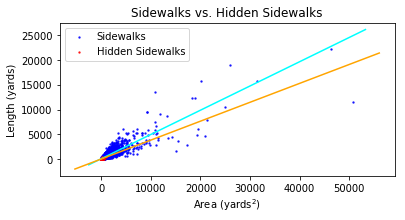

In [52]:
def set_up_plot(show_cor_data=False, 
                show_cor_lines=True,
                show_sin=True, 
                show_hin=True):
    """
    Set Up Plot function
    -show correlation slope   = show_cor_data
    -show correlation lines   = show_cor_lines
    -show sidewalk datapoints = show_sin
    -show hidden datapoint    = show_hin
    """
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    size = 2 #size of the dots
    
    if(show_sin):
        x = sin[:,0] #isolating the length and area
        y = sin[:,1]
        ax.scatter(x, y, alpha=0.75, c="Blue", s=size, label = "Sidewalks")

        #Add Correlation Line for sidewalks
        axes = plt.gca()
        m1,b1 = np.polyfit(sin[:,0], sin[:,1], 1)
        X_plot = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1],100)
        plt.plot(X_plot, m1*X_plot + b1, '-', c="Cyan")
    
    if(show_hin):
        x = hin[:,0]
        y = hin[:,1]
        ax.scatter(x, y, alpha=0.75, c="Red", s=size, label = "Hidden Sidewalks")
        ax.set_aspect('equal')

        #Add Correlation Line for hidden sidewalks
        axes = plt.gca()
        m2,b2 = np.polyfit(hin[:,0], hin[:,1], 1)
        X_plot = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1],100)
        plt.plot(X_plot, m2*X_plot + b2, '-', c="Orange")
    
    #labeling
    plt.xlabel("Area (yards$^2$)")
    plt.ylabel("Length (yards)")
    plt.title("Sidewalks vs. Hidden Sidewalks")
    plt.legend(loc=2)
    
    if(show_cor_data):
        if(show_sin):
            print "Sidewalk Correlation Line Slope:\t", m1
        if(show_hin):
            print "Hidden Sidewalk Correlation Line Slope:", m2

set_up_plot(show_cor_data=True)
plt.show()
    
#correlation line equations:
#https://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python
#scatter chart
#https://pythonspot.com/en/tag/scatter-plot/
#misc matplotlib info:
#https://matplotlib.org/api/pyplot_api.html

Looking at all the data at once shows a fair amount of outliers while most of the data gets crushed together. All of the hidden sidewalk data looks to only be one data point this far out.

Besides the data, we can see the two calculated correlation lines for both the Sidewalks and hidden sidewalks. We can see that on average the sidewalk length is 1/2 of its area. This allows us to infer that the sidewalks are relatively wide at an average of 2 yards. The hidden sidewalks length are not far off at ~.4x its area. This would put the average width at 2.5 yards.

Looking back at the overall averages we aquired from pandas, we can see that the 50th percentile for the total data set sits at around 100 yards and 100 yards<sup>2</sup>. Lets zoom in to take a closer look.

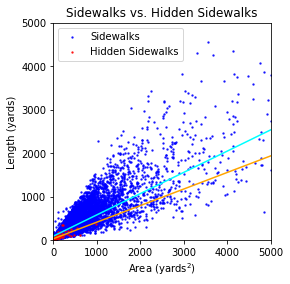

In [47]:
set_up_plot()
plt.axis([0,5000,0,5000])
plt.show()

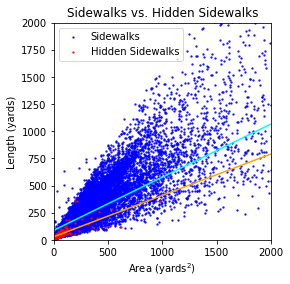

In [48]:
set_up_plot()
plt.axis([0,2000,0,2000])
plt.show()

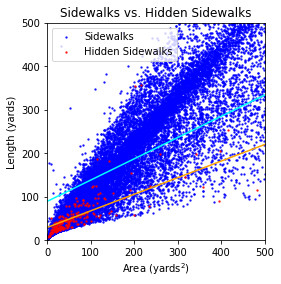

In [49]:
set_up_plot()
plt.axis([0,500,0,500])
plt.show()

As we zoom into the graph more and more, two things become apparent. A secondary correlation becomes apparent among the normal sidewalks, especially when the area and length are in the sub 500 range. Secondly, the hidden sidewalk data becomes much more defined.

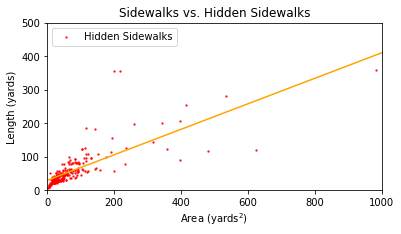

In [50]:
set_up_plot(show_sin=False)
plt.axis([0,1000,0,500])
plt.show()

This looks very similar to the normal sidewalk data from the first graph. Similar distribution of outliers and clumped data. Lets look at the hidden sidewalk average though at 75 yards<sup>2</sup> and 60 yards long.

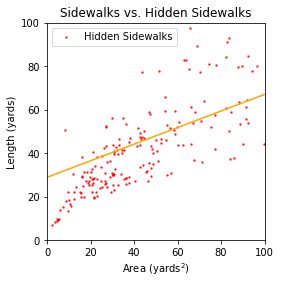

In [51]:
set_up_plot(show_sin=False)
plt.axis([0,100,0,100])
plt.show()

The trends in sidewalk length and area seem to be about the same for both normal sidewalks and hidden sidewalks, they are just scaled to different degrees. A hidden sidewalk plot of 100x100 shows the same patterns as normal sidewalk plot of 500x500. And at the macro level a 1000x500 hidden sidewalk plot looks very similar to a 50000x25000 sidewalk plot.